In [19]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly

Populating the interactive namespace from numpy and matplotlib


In [20]:
filename = 'Cleaned_data.csv'
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df_prime = pd.read_csv(filename,parse_dates=['date'], date_parser=dateparse)

In [21]:
print(df_prime.shape)
df_prime.head(5)

(239399, 33)


,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,location_description,longitude,...,Gang Related,Incident at School,Home Invastion,Mass Shooting,Murder/Suicide,OfficerInvolved,Terrorism,Month,DayofWeek,Year
0,278,95289,2014-01-01,Michigan,Muskegon,0,0,43.2301,NaN,-86.2514,...,0,0,0,0,0,0,0,January,Wednesday,2014
1,279,92401,2014-01-01,New Jersey,Newark,0,0,40.7417,NaN,-74.1695,...,0,0,0,0,0,1,0,January,Wednesday,2014
2,280,92383,2014-01-01,New York,Queens,1,0,40.7034,NaN,-73.7474,...,0,0,0,0,0,0,0,January,Wednesday,2014
3,281,92142,2014-01-01,New York,Brooklyn,0,1,40.6715,NaN,-73.9476,...,0,0,0,0,0,0,0,January,Wednesday,2014
4,282,95261,2014-01-01,Missouri,Springfield,0,1,37.2646,NaN,-93.3007,...,0,0,0,0,0,0,0,January,Wednesday,2014


In [22]:
state_df = df_prime.groupby(['state','Year']).agg({'incident_id': 'count'}).sort_values(by='incident_id', ascending=False).reset_index()
state_df.head()

,state,Year,incident_id
0,Illinois,2017,5089
1,Illinois,2016,5055
2,California,2017,4588
3,Florida,2016,4201
4,Florida,2017,4156


In [23]:
state_df_2014 = df_prime[df_prime['Year']==2014].groupby('state').agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='incident_id', ascending=False).reset_index()
state_df_2015 = df_prime[df_prime['Year']==2015].groupby('state').agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='incident_id', ascending=False).reset_index()
state_df_2016 = df_prime[df_prime['Year']==2016].groupby('state').agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='incident_id', ascending=False).reset_index()
state_df_2017 = df_prime[df_prime['Year']==2017].groupby('state').agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='incident_id', ascending=False).reset_index()
state_df_2014.head()

,state,incident_id,n_killed,n_injured
0,California,3732,1320,1607
1,Florida,3138,873,1463
2,Texas,3133,1094,1157
3,Illinois,3095,637,2276
4,Ohio,2368,494,1120


In [24]:
# Rename the states for a correct mapping
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE',
                 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN',
                 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN',
                 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA',
                 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA',
                 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
                 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL',
                 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
                 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ',
                 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}

state_df_2014['state_code'] = state_df_2014['state'].apply(lambda x : state_to_code[x])
state_df_2015['state_code'] = state_df_2015['state'].apply(lambda x : state_to_code[x])
state_df_2016['state_code'] = state_df_2016['state'].apply(lambda x : state_to_code[x])
state_df_2017['state_code'] = state_df_2017['state'].apply(lambda x : state_to_code[x])

# Store the data of the subplots
data = []
# Layout for the whole plot
layout = dict(title = 'Incidents grouped by state',
              width = 1000,
              height = 400,
              hovermode = False)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#baff00'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2014['state_code'],
                 geo = 'geo',
                 z = state_df_2014['incident_id'],
                 text = state_df_2014['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2014",
                                 x=0.22,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0/4,1/4], y = [0,1]))

# Sum-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2015['state_code'],
                 geo = 'geo2',
                 z = state_df_2015['incident_id'],
                 text = state_df_2015['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2015",
                                 x=0.47,
                                 thickness=10)))
layout['geo2'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [1/4,2/4], y = [0,1]))

# Mean-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#ffba00'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2016['state_code'],
                 geo = 'geo3',
                 z = state_df_2016['incident_id'],
                 text = state_df_2016['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2016",
                                 x=0.72,
                                 thickness=10)))
 
layout['geo3'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [2/4,3/4], y = [0,1]))


# Mean-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#f00567'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2017['state_code'],
                 geo = 'geo4',
                 z = state_df_2017['incident_id'],
                 text = state_df_2017['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2017",
                                 x=0.98,
                                 thickness=10)))
 
layout['geo4'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [3/4,4/4], y = [0,1]))




# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

In [25]:
filename = 'Pop By State.csv'
df_state_pop = pd.read_csv(filename)
df_state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,40,3,6,1,Alabama,0,0,1,0,37991,37991,37790,38555,37705,36687,37433,37545,37522,36196,35256
1,40,3,6,1,Alabama,0,0,1,1,38150,38150,38036,37689,38470,37732,36838,37740,37575,37799,36352
2,40,3,6,1,Alabama,0,0,1,2,39738,39738,39570,38202,37621,38398,37644,36986,37841,37770,38000
3,40,3,6,1,Alabama,0,0,1,3,39827,39828,39806,39690,38113,37684,38473,37763,37103,37953,37965
4,40,3,6,1,Alabama,0,0,1,4,39353,39353,39493,39873,39628,38122,37719,38494,37820,37162,38089


In [26]:
# get population by state from Census data

pop_df_agg = df_state_pop.groupby('NAME').agg({'POPESTIMATE2014': 'sum', 'POPESTIMATE2015': 'sum', 'POPESTIMATE2016': 'sum',
                            'POPESTIMATE2017': 'sum', 'POPESTIMATE2018': 'sum'
                            } )
pop_df_agg = pop_df_agg.apply(lambda x: x/1000000)
pop_df_agg.reset_index(inplace=True)

pop_df_agg.rename(columns={'NAME':'state'}, inplace=True)
pop_df_agg.head()

,state,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,Alabama,19.369924,19.412640,19.458980,19.500480,19.551484
1,Alaska,2.945228,2.950188,2.966016,2.959144,2.949752
2,Arizona,26.935360,27.334384,27.781808,28.195504,28.686584
3,Arkansas,11.870904,11.913628,11.961640,12.011988,12.055300
4,California,154.500556,155.812568,156.836508,157.597396,158.228180


In [27]:
state_df_2014.head()

,state,incident_id,n_killed,n_injured,state_code
0,California,3732,1320,1607,CA
1,Florida,3138,873,1463,FL
2,Texas,3133,1094,1157,TX
3,Illinois,3095,637,2276,IL
4,Ohio,2368,494,1120,OH


In [28]:
state_df_2014 = pd.merge(state_df_2014,pop_df_agg,how = 'inner',on = 'state')
state_df_2014 = state_df_2014.drop(columns=['POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018'])
state_df_2014['incidentspermil'] = state_df_2014['incident_id']/state_df_2014['POPESTIMATE2014']
state_df_2014.head()

,state,incident_id,n_killed,n_injured,state_code,POPESTIMATE2014,incidentspermil
0,California,3732,1320,1607,CA,154.500556,24.155253
1,Florida,3138,873,1463,FL,79.441320,39.500854
2,Texas,3133,1094,1157,TX,107.908568,29.033839
3,Illinois,3095,637,2276,IL,51.555848,60.031987
4,Ohio,2368,494,1120,OH,46.411892,51.021406


In [29]:
state_df_2015 = pd.merge(state_df_2015,pop_df_agg,how = 'inner',on = 'state')
state_df_2015 = state_df_2015.drop(columns=['POPESTIMATE2014','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018'])
state_df_2015['incidentspermil'] = state_df_2015['incident_id']/state_df_2015['POPESTIMATE2015']
state_df_2015.head()

,state,incident_id,n_killed,n_injured,state_code,POPESTIMATE2015,incidentspermil
0,Illinois,3456,688,2822,IL,51.457368,67.162394
1,Texas,3276,1136,1355,TX,109.947256,29.796105
2,California,3234,1204,1617,CA,155.812568,20.755707
3,New York,2903,463,1521,NY,78.645644,36.912407
4,Georgia,2767,595,1096,GA,40.724444,67.944451


In [30]:
state_df_2016 = pd.merge(state_df_2016,pop_df_agg,how = 'inner',on = 'state')
state_df_2016 = state_df_2016.drop(columns=['POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2017','POPESTIMATE2018'])
state_df_2016['incidentspermil'] = state_df_2016['incident_id']/state_df_2016['POPESTIMATE2016']
state_df_2016.head()

,state,incident_id,n_killed,n_injured,state_code,POPESTIMATE2016,incidentspermil
0,Illinois,5055,946,4137,IL,51.307580,98.523454
1,Florida,4201,1001,1846,FL,82.519928,50.908915
2,California,3617,1265,1896,CA,156.836508,23.062232
3,Texas,3606,1313,1614,TX,111.749968,32.268466
4,New York,2522,416,1275,NY,78.566356,32.100254


In [31]:
state_df_2017 = pd.merge(state_df_2017,pop_df_agg,how = 'inner',on = 'state')
state_df_2017 = state_df_2017.drop(columns=['POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2018'])
state_df_2017['incidentspermil'] = state_df_2017['incident_id']/state_df_2017['POPESTIMATE2017']
state_df_2017.head()

,state,incident_id,n_killed,n_injured,state_code,POPESTIMATE2017,incidentspermil
0,Illinois,5089,959,3629,IL,51.144784,99.501838
1,California,4588,1423,1953,CA,157.597396,29.112156
2,Florida,4156,950,1801,FL,83.907248,49.530882
3,Texas,2875,1169,1565,TX,113.290868,25.377156
4,Ohio,2701,700,1517,OH,46.656516,57.891164


In [32]:
state_df_2014 = state_df_2014[state_df_2014['state'] != 'District of Columbia' ]
state_df_2015 = state_df_2015[state_df_2015['state'] != 'District of Columbia' ]
state_df_2016 = state_df_2016[state_df_2016['state'] != 'District of Columbia' ]
state_df_2017 = state_df_2017[state_df_2017['state'] != 'District of Columbia' ]

In [33]:
# Store the data of the subplots
data = []
# Layout for the whole plot
layout = dict(title = 'Incidents by state - per 1M',
              width = 1000,
              height = 400,
              hovermode = False)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#baff00'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2014['state_code'],
                 geo = 'geo',
                 z = state_df_2014['incidentspermil'],
                 text = state_df_2014['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2014",
                                 x=0.22,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0/4,1/4], y = [0,1]))

# Sum-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2015['state_code'],
                 geo = 'geo2',
                 z = state_df_2015['incidentspermil'],
                 text = state_df_2015['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2015",
                                 x=0.47,
                                 thickness=10)))
layout['geo2'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [1/4,2/4], y = [0,1]))

# Mean-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#ffba00'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2016['state_code'],
                 geo = 'geo3',
                 z = state_df_2016['incidentspermil'],
                 text = state_df_2016['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2016",
                                 x=0.72,
                                 thickness=10)))
 
layout['geo3'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [2/4,3/4], y = [0,1]))


# Mean-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#f00567'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df_2017['state_code'],
                 geo = 'geo4',
                 z = state_df_2017['incidentspermil'],
                 text = state_df_2017['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents - 2017",
                                 x=0.98,
                                 thickness=10)))
 
layout['geo4'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [3/4,4/4], y = [0,1]))




# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

In [34]:
def cleaned(n):
    if n == 2:
        return 1
    else:
        return n

df_prime['Children/School'] = df_prime['Incident at School'] + df_prime['Children Injured/Killed']
df_prime['Drug/Gang Related'] = df_prime['Gang Related'] + df_prime['Drug Related']

df_prime['Children/School'] = df_prime['Children/School'].map(cleaned) 
df_prime['Drug/Gang Related'] = df_prime['Drug/Gang Related'].map(cleaned) 

df_prime['hurt'] = df_prime['n_killed'] + df_prime['n_injured']

### Alaska

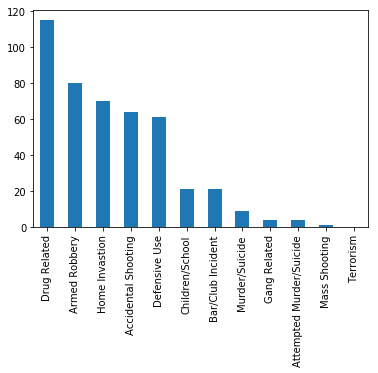

In [40]:
df_prime[df_prime['state']=='Alaska'][['Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children/School', 'Defensive Use',
       'Drug Related','Gang Related', 
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
        'Terrorism']].sum().sort_values(ascending=False).plot(kind='bar')

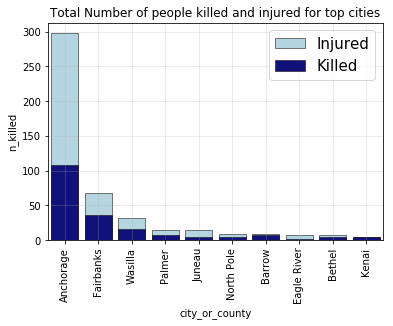

In [18]:
city_df = df_prime[df_prime['state']=='Alaska'].groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[:10]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()